# Sprints Graduation Project

This project aims to:
- Explore the data
- Clean the data effectively
- Analyze the data
- Build a transformer from scratch to classify offensive comments
- Optimize the model and try to evaluate with a higher accuracy

## PREPARE

I need to prepare everything I'll need as:
- Tools: My IDE environment
- Languages: Python
- Libararies: All needed libararies to manipulate the data and build the transformer
- Datasets: The datasets that will be used for the data exploration, and training and testing

### Importing needed packages

In [160]:
# Needed packages to manipulate the data
import pandas as pd
import numpy as np

# Needed packages to draw visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Needed packages to clean the dataset
# For URLs and punctuations
import re 
# For stop words, stemming, and lemmatization
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# For expanding contractions
import contractions
# For normalizing number to words
import inflect
# For correcting spelling mistakes
from spellchecker import SpellChecker

# Needed package to oversample the data
from imblearn.over_sampling import RandomOverSampler

# Needed packages to build the transformer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from collections import Counter
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
import math

# Needed package to split the dataset for training
from sklearn.model_selection import train_test_split

# Needed package to evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muazs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muazs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Uploading the Dataset

In [161]:
path = "C:/Users/muazs/Desktop/Sprints/Grad Project/train.csv"

data = pd.read_csv(path) # Uploading the dataset using read_csv function

data.head() # To check if it was uploaded correctly or not

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## EXPLORE

Here we will explore the basic information about the dataset like:
- Shape
- Numerical Description
- Object Description
- Column Types

### Shape

In [162]:
data.shape # extracting my dataset shape

(159571, 8)

I have 159K rows and 8 columns

### Description

In [163]:
data.describe().T # extracting numerical columns description

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
severe_toxic,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
obscene,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
insult,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
identity_hate,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [164]:
data.describe(include='O').T # extracting object columns description

,count,unique,top,freq
id,159571,159571,0000997932d777bf,1
comment_text,159571,159571,Explanation\nWhy the edits made under my usern...,1


Numerical Description:
- We can see a huge imbalance in the data
- The mean here also tells me the distribution and percentages of each column since they are 0's and 1's

Textual Description:
- We can see that the top value's freq is 1, that means there are no duplicates until now

### Column Types

In [165]:
data.dtypes # extracting the columns data types

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

I have 2 objects and 6 integers (That's in the origin binary of 0's and 1's)

The types of the columns are logical and there's no need to update any column's type

## PROCESS

### Text Processing Functions Making

In order to build an effective cleaning function, I chose to build each function individually and test it to make sure it's working right

The functions are:
- Turning Text to Lower Case Format
- Removing URLs
- Expanding Contractions
- Removing any Special Characters
- Tokenizing the Text
- Renaming Numbers from Digit to Text
- Removing Stop Words
- Stemming the Text
- Lemmatizing the Text
- Correcting Spelling Mistakes

#### Turning to Lower Case

In [166]:
def LowerCase(text):
    return text.lower() # In this function I transform every text to lower case using the lower function

In [167]:
LowerCase('HELLO') # Expected Output: 'hello'

'hello'

The fucntions works great on the test case

#### Remove URLs

In [168]:
def RemoveURLs(text):
    return re.sub(r'http\S+', '', text) # In this fucntion it searches for any word that have the letters 'http' in it and replaces it with '' (nothing) 

In [169]:
RemoveURLs('This is my link: https://music.youtube.com/watch?v=I1Fu8mjaC94&list=LM') # Expected Output: 'This is my link: '

'This is my link: '

The fucntions works great on the test case

#### Contractions

In [170]:
def ExpandContractions(text):
    return contractions.fix(text) # This function uses contraction library to expand any contractions from the text

In [171]:
ExpandContractions("I won't do this since I'm not a kid anymore can't") # Expected Output: won't -> will not, I'm -> I am, and can't -> cannot

'I will not do this since I am not a kid anymore cannot'

The fucntions works great on the test case

#### Removing Special Characters

In [172]:
def RemoveSpecialCharacters(text):
    return re.sub(r'[^a-z0-9\s]+', ' ', text) # Using regex library I select only letters from a to z and numbers from 0 to 9, else it gets replaced with ' ' (space)

In [173]:
RemoveSpecialCharacters("can't +#. now.12") # Expected Output: removing any special characters and gets replaced by space

'can t   now 12'

The fucntions works great on the test case, and the reason why I have chose space instead of nothing is text like "now.12" would be:

1)Without Space:
- now12

2)With Space:
- now 12

In the first case 'now12' is being handled like an ID. But, in the second case 'now 12' is being handled as seperate word and number, so the transfomration of the stemming would work correctly on 'now' and normalizing number would work correctly on '12'

#### Tokenizing

In [174]:
def tokenize(text):
    return text.split() # Here I used the split function to tokenize words and sentences

In [175]:
tokenize('Hello everyone my name is Muaz') # Expected Output: Adding the sentence in a list and seperating each word

['Hello', 'everyone', 'my', 'name', 'is', 'Muaz']

The fucntions works great on the test case

#### Handing Numbers

In [176]:
p = inflect.engine() # Intializing inflect

def normalize_numbers_to_words(text):
    return [p.number_to_words(word) if word.isdigit() else word for word in text] # Using the inflect package and an if condition, it checks if the word is a digit and if so it transforms it to words else it leaves the original word as it is

In [177]:
normalize_numbers_to_words(['12500123']) # Expected Output: turning the numbers to words

['twelve million, five hundred thousand, one hundred and twenty-three']

The fucntions works great on the test case

#### Removing Stop Words

In [178]:
stop_words = set(stopwords.words('english')) # Downloading the stop words of English language

def RemoveStopwords(text): 
    filtered_words = [word for word in text if word not in stop_words] # Here's where I add only the words that are not in the stop words (basically filtering out stop words)
    return filtered_words

In [179]:
print(stop_words) # These are the list of stop words

{'doing', 've', 'such', 'are', 'any', 'our', "didn't", 'why', 'herself', 'at', "you're", 'is', 'their', 'how', 'a', 'too', 'with', 'weren', 'd', 'ma', 'here', 'no', "haven't", 'she', "shouldn't", 'about', "mustn't", 'hers', 'you', 'or', 'did', 'yours', "isn't", "you've", 'from', 'was', 'above', 'does', 'of', 'own', 'will', 're', 'mustn', 'to', 'wasn', 'only', 'down', 'y', 'aren', 'it', 'didn', 'shan', "you'll", 'do', 'few', 'has', 'until', 's', 'whom', 'by', 'against', "it's", 'that', "hasn't", 'and', 'wouldn', 'for', 'out', 'over', 'needn', 'other', 'while', 'which', 'up', 'i', 'under', 'through', 'they', 'had', "doesn't", 'nor', 'all', 'each', 'ain', 'them', 'an', 'be', "wasn't", 'he', 'where', 'before', 'once', 'most', 'very', 'hadn', 'on', 'just', 'my', 'its', 'themselves', 'then', 'off', 'both', "that'll", 't', 'himself', 'll', 'shouldn', 'your', 'because', "won't", 'ourselves', 'we', 'been', "should've", 'theirs', 'now', 'further', 'in', 'these', 'into', 'so', 'ours', 'have', 'wh

In [180]:
RemoveStopwords(['i','am','the','best']) # Expected Output: Leaving 'best' only since it's not a stop word

['best']

The fucntions works great on the test case

#### Stemming

In [181]:
ss = SnowballStemmer(language='english')  # Intializing SnowballStemmer with the English Language

def StemWords(text):
    return [ss.stem(word) for word in text] # Using the stem function from SnowballStemmer to stem every word in words

In [182]:
StemWords(['playing']) # Expected Output: Remove the endings the words like 'ed', 'ing', 's', etc

['play']

The fucntions works great on the test case

#### Lemmatization

In [183]:
lemmatizer = WordNetLemmatizer() # Intializing the Lemmatizer

def LemmatizeWords(text):
    return [lemmatizer.lemmatize(word) for word in text] # Using a for loop it lemmatizes every word that passes through

In [184]:
LemmatizeWords(['mice']) # Expected Output: Returning words to its origin

['mouse']

The fucntions works great on the test case

#### Spelling Mistakes

In [185]:
spell = SpellChecker() # Intializing the spellchecker

def correct_spelling(text):
    return [spell.correction(word) if spell.correction(word) is not None else word for word in text] # Using the spell checker package it checks if the word correction is not None then it corrects the word, if is is None then it leaves it as the same

In [186]:
correct_spelling(['helocobter']) # Expected Output: Correcting the word spelling

['helicopter']

The fucntions works great on the test case

### Cleaning

#### Testing the Order between Stemming, Lemmatization, Spelling Check

After building the small functions, it's time to arrange the sequence of the functions and build the big one

In [187]:
print("INPUT")
token = ["running", "happiness", "children", "polunomil", "playintg", "everyone", "thats"]
print(token)
print("")

print("1) Spelling Check 1")
token = correct_spelling(token)
print(token)
print("")

print("2) Stemming")
token = StemWords(token)
print(token)
print("")

print("3) Spelling Check 2")
token = correct_spelling(token)
print(token)
print("")

print("4) Lemmatization")
token = LemmatizeWords(token)
print(token)
print("")

print("5) Spelling Check 3")
token = correct_spelling(token)
print(token)

INPUT
['running', 'happiness', 'children', 'polunomil', 'playintg', 'everyone', 'thats']

1) Spelling Check 1
['running', 'happiness', 'children', 'polynomial', 'playing', 'everyone', 'thats']

2) Stemming
['run', 'happi', 'children', 'polynomi', 'play', 'everyon', 'that']

3) Spelling Check 2
['run', 'happy', 'children', 'polynomial', 'play', 'everyone', 'that']

4) Lemmatization
['run', 'happy', 'child', 'polynomial', 'play', 'everyone', 'that']

5) Spelling Check 3
['run', 'happy', 'child', 'polynomial', 'play', 'everyone', 'that']


After many testing I found that this sequence is the perfect sequence. It was also useful to use stemming and lemmatization together.. since both will reduce my word count and will be helpful in the training process

- My base was the spelling checker function since it's the one that helps the lemmatization and stemming to work effectively so I started with it to ensure the words are correct like 'playintg' to 'playing'
- Then I used the stemming to help me in words like 'running' and 'playing' to 'run and 'play'
- I have then used again the spelling checker since the stemming ruined 'happiness' to 'happi' since it removes 'ness', so with the spelling checker it fixes it back to 'happy'
- Then I used the lemmatization to help me get back the origin of the words like 'children' to 'child'
- I have then applied spelling checker again to make sure every thing is right

I have also attached some other words in my test case to be checked and approves my point

#### The BIG Function Tracing

I built the tracing/testing function with print after every step so I can see how will it react and ensure everything is running smoothly

I also built it for me to check where did the errors exist and fix it

In [188]:
def clean(text):
    #1
    text = LowerCase(text)
    print("Lower case: " + text)
    #2
    text = RemoveURLs(text)
    print("Remove URL: " + text)
    #3
    text = ExpandContractions(text)
    print("Expand Contractions: " + text)
    #4
    text = RemoveSpecialCharacters(text)
    print("Remove Special Characters: " + text)
    #5
    text = tokenize(text)
    print("tokenizing: ", end="")
    print(text)
    #6
    text = RemoveStopwords(text)
    print("Remove Stopwords: ", end="")
    print(text)
    #7
    #text = normalize_numbers_to_words(text)
    #print("normalize numbers to words: ", end="")
    #print(text)
    #8
    #text = correct_spelling(text)
    #print("correct spelling 1: ", end="")
    #print(text)
    #9
    text = StemWords(text)
    print("Stem Words: ", end="")
    print(text)
    #10
    #text = correct_spelling(text)
    #print("correct spelling 2: ", end="")
    #print(text)
    #11
    text = LemmatizeWords(text)
    print("Lemmatize Words: ", end="")
    print(text)
    #12
    #text = correct_spelling(text)
    #print("correct spelling 3: ", end="")
    #print(text)

In [189]:
testx = "Hello everyone I am Muaz, and I don't love running at #62 avenu. Because there are alot of children. Refrence https://world.org"
clean(testx)

Lower case: hello everyone i am muaz, and i don't love running at #62 avenu. because there are alot of children. refrence https://world.org
Remove URL: hello everyone i am muaz, and i don't love running at #62 avenu. because there are alot of children. refrence 
Expand Contractions: hello everyone i am muaz, and i do not love running at #62 avenu. because there are alot of children. refrence 
Remove Special Characters: hello everyone i am muaz  and i do not love running at  62 avenu  because there are alot of children  refrence 
tokenizing: ['hello', 'everyone', 'i', 'am', 'muaz', 'and', 'i', 'do', 'not', 'love', 'running', 'at', '62', 'avenu', 'because', 'there', 'are', 'alot', 'of', 'children', 'refrence']
Remove Stopwords: ['hello', 'everyone', 'muaz', 'love', 'running', '62', 'avenu', 'alot', 'children', 'refrence']
Stem Words: ['hello', 'everyon', 'muaz', 'love', 'run', '62', 'avenu', 'alot', 'children', 'refrenc']
Lemmatize Words: ['hello', 'everyon', 'muaz', 'love', 'run', '62',

The tracing fucntion works great and output seems to run smoothly

#### The BIG Function Final

I have then built the final cleaning function 

In [190]:
def cleanFinal(text):
    #1
    text = LowerCase(text)
    #2
    text = RemoveURLs(text)
    #3
    text = ExpandContractions(text)
    #4
    text = RemoveSpecialCharacters(text)
    #5
    text = tokenize(text)
    #6
    text = RemoveStopwords(text)
    #7
    #text = normalize_numbers_to_words(text)
    #8
    #text = correct_spelling(text)
    #9
    text = StemWords(text)
    #10
    #text = correct_spelling(text)
    #11
    text = LemmatizeWords(text)
    #12
    #text = correct_spelling(text)

    return text

In [191]:
testFinal = "Hello everyone I am Muaz, and I don't love running at c#62 avenu. Because there are alot of children. Refrence https://world.org"
print(cleanFinal(testFinal))

['hello', 'everyon', 'muaz', 'love', 'run', 'c', '62', 'avenu', 'alot', 'child', 'refrenc']


On this test case the final output looks exactly like the one we need

#### Applying the BIG Function on a Sample

I have then applied it on a small sample to check that everthing is good

In [192]:
data20 = data.head(20) # I sampled out the first 20 rows only to test the final cleaning function on
data20.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [193]:
data20.shape # Checking if I sampled the first 20 rows successfully 

(20, 8)

In [194]:
data20['cleaned'] = data20['comment_text'].apply(lambda text: cleanFinal(text)) # Applying the cleaning function

C:\Users\muazs\AppData\Local\Temp\ipykernel_13988\1646017216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['cleaned'] = data20['comment_text'].apply(lambda text: cleanFinal(text)) # Applying the cleaning function


In [195]:
data20.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explan, edit, made, usernam, hardcor, metalli..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[aww, match, background, colour, seem, stuck, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, realli, tri, edit, war, guy, consta..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[cannot, make, real, suggest, improv, wonder, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[sir, hero, chanc, rememb, page]"
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,"[congratul, well, use, tool, well, talk]"
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,"[cocksuck, piss, around, work]"
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,"[vandal, matt, shirvington, articl, revert, pl..."
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,"[sorri, word, nonsens, offens, anyway, intend,..."
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,"[align, subject, contrari, dulithgow]"


The fucntion reacts greatly on that sample and I am satisfied with the output

#### Applying the BIG Function on the Data

After making sure of the function from many different point of views it's time to apply the BIG function

In [196]:
data['cleaned'] = data['comment_text'].apply(lambda text: cleanFinal(text)) # Applying the function on all the dataset

I wanted to use normalzing numbers to words and correcting spelling but the following occured:
1) Spelling checker took 1 day and 8 hours running on the whole dataset and then an error occured. So, I decided to remove it
2) Removing the spelling checker means that using stemming and lemmatization together won't function with the highest accuracy but it will reduce the unique word count from 163K to 136K (checked from the word count from the analyze section)
3) Without using the spelling chekcer at the end, some words will be written wrongly
4) Normalizing numbers to words always caused an unknown error that I was unable solve. So, I removed it

I used hashtags on the above main cleaning functions, the tracing and the final ones, instead of removing them to leave my footprint of what I was trying to do

In [197]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explan, edit, made, usernam, hardcor, metalli..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[aww, match, background, colour, seem, stuck, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, realli, tri, edit, war, guy, consta..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[cannot, make, real, suggest, improv, wonder, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[sir, hero, chanc, rememb, page]"


Now the data is fully cleaned and we can proceed

### Handling Nulls

In [198]:
data.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
cleaned          0
dtype: int64

There are no nulls to handle in my dataset

## ANALYZE

### Word Count

#### Counting the Occurrences

In [200]:
wc = {}  # Creating an empty list to save the occurances of each word

for token in data['cleaned']: # To access the tokenized array
    for word in token: # To access ecah word in the tokenized array of the comment_text column
        if word in wc: # If the word already existed in my wc list add 1
            wc[word] += 1
        else: # Else if the word didn't exist in my wc list assign it with 1
            wc[word] = 1

wc_df = pd.DataFrame(list(wc.items()), columns=['Word', 'Occurrences']) # Creating a dataframe with the wc list

wc_df = wc_df.sort_values(by='Occurrences', ascending=False) # Sorting the words by Occurrences from largest to smallest  

#### Top 10 Repeated

In [201]:
wc_df.head(10) # To get the most repeated words

,Word,Occurrences
85,articl,74217
20,page,57126
93,wikipedia,46257
1,edit,41553
19,talk,39848
121,would,36266
103,use,35273
75,one,30737
266,like,30477
16,plea,30057


These are the top 10 repeated words in my dataset and their occurrences

#### Least 10 Repeated

In [202]:
wc_df.tail(10)

,Word,Occurrences
75319,schriever,1
75318,6134,1
75317,719,1
75315,regardin,1
75312,aruni,1
75311,kaivalya,1
75310,kornbluh,1
75306,trollbox,1
75305,scouser,1
136392,ciu,1


These are the least 10 repeated words in my dataset and their occurrences

#### Unique Words Count

In [203]:
print(wc_df.shape) # The number of rows here will represent the unique words in my dataset

(136393, 2)


I have 136K unique words in my dataset

### Understanding the Numbers

Here I will be viewing the distributions of the numerical columns

#### Toxic Distribution

In [204]:
print("Count: ", end='')
print(data['toxic'].value_counts()) # Counting the unique values in that column 

print("")

print("Percentage: ", end='')
print(data['toxic'].value_counts(normalize=True)*100) # Finding the percentage of each unique value in that column

Count: toxic
0    144277
1     15294
Name: count, dtype: int64

Percentage: toxic
0    90.415552
1     9.584448
Name: proportion, dtype: float64


#### Severe Toxic Distribution

In [205]:
print("Count: ", end='')
print(data['severe_toxic'].value_counts()) # Counting the unique values in that column 

print("")

print("Percentage: ", end='')
print(data['severe_toxic'].value_counts(normalize=True)*100) # Finding the percentage of each unique value in that column

Count: severe_toxic
0    157976
1      1595
Name: count, dtype: int64

Percentage: severe_toxic
0    99.000445
1     0.999555
Name: proportion, dtype: float64


#### Obscene Distribution

In [206]:
print("Count: ", end='')
print(data['obscene'].value_counts()) # Counting the unique values in that column 

print("")

print("Percentage: ", end='')
print(data['obscene'].value_counts(normalize=True)*100) # Finding the percentage of each unique value in that column

Count: obscene
0    151122
1      8449
Name: count, dtype: int64

Percentage: obscene
0    94.705178
1     5.294822
Name: proportion, dtype: float64


#### Threat Distribution

In [207]:
print("Count: ", end='')
print(data['threat'].value_counts()) # Counting the unique values in that column 

print("")

print("Percentage: ", end='')
print(data['threat'].value_counts(normalize=True)*100) # Finding the percentage of each unique value in that column

Count: threat
0    159093
1       478
Name: count, dtype: int64

Percentage: threat
0    99.700447
1     0.299553
Name: proportion, dtype: float64


#### Insult Distribution

In [208]:
print("Count: ", end='')
print(data['insult'].value_counts()) # Counting the unique values in that column 

print("")

print("Percentage: ", end='')
print(data['insult'].value_counts(normalize=True)*100) # Finding the percentage of each unique value in that column

Count: insult
0    151694
1      7877
Name: count, dtype: int64

Percentage: insult
0    95.063639
1     4.936361
Name: proportion, dtype: float64


#### Identity Hate Distribution

In [209]:
print("Count: ", end='')
print(data['identity_hate'].value_counts()) # Counting the unique values in that column 

print("")

print("Percentage: ", end='')
print(data['identity_hate'].value_counts(normalize=True)*100) # Finding the percentage of each unique value in that column

Count: identity_hate
0    158166
1      1405
Name: count, dtype: int64

Percentage: identity_hate
0    99.119514
1     0.880486
Name: proportion, dtype: float64


#### Summary

Toxic, obscene, and insult are the most ones covering the columns while the others are less than 1% of the whole data

As seen from the data description and the numbers understanding, the numerical attributes are so imbalanced


### Imbalanced

In order to solve the imbalance in the data, I came out with these three approaches:
1) Combining all the numerical columns together and then turing it into binary, so I can increase the number of the bad text in the data
2) Using oversampling to increase the number of the minor, which is the bad text, but I am afraid it would cause and overfitting since there will be many duplicates
3) Using undersampling to decrease the number of the major, which was the good text, but I did not reccomend it since the minor count is too small. Therefore, it could decrease the number of rows and let me dismiss some important features that would've tarined in the model 

#### 1) Making Offensive Column

I will add all the numerical columns together. After that, if its greater than 0 I will assign it with 1, else I will assign it with 0

In [210]:
# Calculating the sum of the numerical columns
data['Offensive'] = data['toxic'] + data['severe_toxic'] + data['obscene'] + data['threat'] + data['insult'] + data['identity_hate']

In order to check, I am expecting, since they are 6 columns, the max value to be 6 and the least to be 0  

In [211]:
print(data['Offensive'].min())
print(data['Offensive'].max())

0
6


The methodology is working great until now

In [212]:
# Applying the if fucntion to do as I have expalined above
data['Offensive'] = data['Offensive'].apply(lambda x: 1 if x > 0 else 0)

Checking the count and percentage to see if I solved the imbalanced yet

In [213]:
print("Count: ", end='')
print(data['Offensive'].value_counts())

print("")

print("Percentage: ", end='')
print(data['Offensive'].value_counts(normalize=True)*100)

Count: Offensive
0    143346
1     16225
Name: count, dtype: int64

Percentage: Offensive
0    89.832112
1    10.167888
Name: proportion, dtype: float64


The max before dealing with the imbalanced data was 9% now it's 10%, which means I have slightly improved it but it's not the best approach yet

#### 2) Oversampling

In [214]:
X = data.drop(columns=['Offensive'])  # All my features will be assigned in X
y = data['Offensive']  # The target feature that will be the base in the oversampling will be in y

# Initializing the oversampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42) # Using the minor strategy that will make the rows with 1's to be duplicated until it reaches 50% to 50% 

# Applying the oversampling to balance the classes
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Creating a new datafram with the balanced values
dataB = pd.DataFrame(data=X_resampled, columns=X.columns)
dataB['Offensive'] = y_resampled

Checking the count and percentage to see if I solved the imbalanced yet

In [215]:
print("Count: ", end='')
print(dataB['Offensive'].value_counts())

print("")

print("Percentage: ", end='')
print(dataB['Offensive'].value_counts(normalize=True)*100)

Count: Offensive
0    143346
1    143346
Name: count, dtype: int64

Percentage: Offensive
0    50.0
1    50.0
Name: proportion, dtype: float64


I have solved it effectively, but I will need to consider the overfitting that might happen while training the model

In [216]:
dataB.shape # Checking my new dataframe shape

(286692, 10)

I have now 286K rows after oversampling

### Correalation

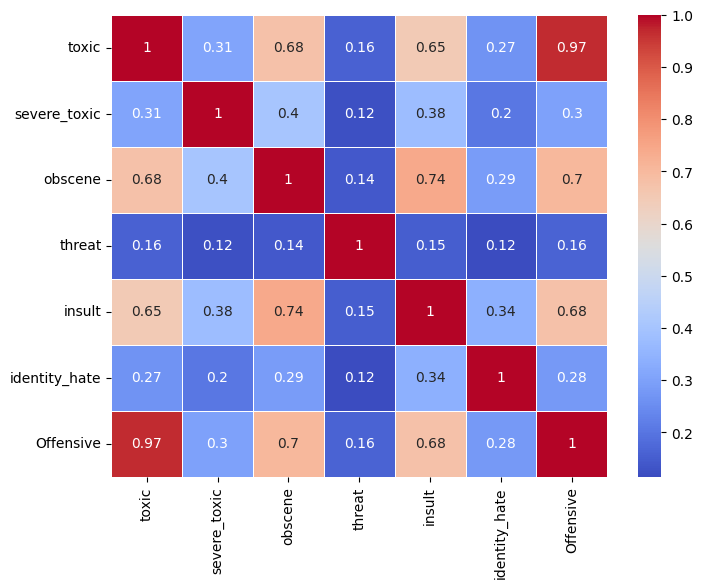

In [217]:
# Calculate the correlation matrix
datax = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'Offensive']]

correlation_matrix = datax.corr()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap with color coding
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

Since toxic, insult, and obscene were the top in my dataset's coverage they are expected to be highly correlated together 

Since also offensive column are made by the use of all other columns, it's expected to see that it's also highly correlated with toxic, insult, and obscene

## TRANSFORMER

### Model

Here I will be craeting the transformer model from scratch

It will include:
- Multi Head Attention
- Position wise Feed forward
- Positional Encoding
- Encoder Layer
- Transformer for Classification

I did not use a decoder layer. Since, decoders are usually used in translating but in our project objectives we just want to classify

In [218]:
# Multi-Head Attention Layer: This layer performs multi-head self-attention on input sequences 
# It partitions the input into multiple vertices, calculates attention scores, and combines the results
# this is an important capture feature that stops between words
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads  # Number of attention heads
        self.d_model = d_model    # Dimension of input
        assert d_model % self.num_heads == 0  # Ensure that d_model is divisible by num_heads
        self.depth = d_model // self.num_heads  # Depth of each head's output

        self.wq = nn.Linear(d_model, d_model)  # Linear transformation for query
        self.wk = nn.Linear(d_model, d_model)  # Linear transformation for key
        self.wv = nn.Linear(d_model, d_model)  # Linear transformation for value

    def split_heads(self, x, batch_size):
        x = x.view(batch_size, -1, self.num_heads, self.depth)  # Reshape input for multiple heads
        return x.permute(0, 2, 1, 3)  # Permute dimensions for correct attention calculation

    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)  # Get batch size
        q = self.split_heads(self.wq(query), batch_size)  # Apply linear transformation and split into heads
        k = self.split_heads(self.wk(key), batch_size)
        v = self.split_heads(self.wv(value), batch_size)

        # Calculate attention scores and apply an optional mask
        attn_scores = torch.matmul(q, k.transpose(-2, -1)) / (self.depth ** 0.5)
        if mask is not None:
            attn_scores += mask

        # Compute attention probabilities and attended values
        attn_probs = torch.nn.functional.softmax(attn_scores, dim=-1)
        attended_values = torch.matmul(attn_probs, v)
        attended_values = attended_values.permute(0, 2, 1, 3).contiguous().view(batch_size, -1, self.d_model)
        # Reshape and concatenate the attended values

        return attended_values

# Position-wise Feedforward Layer: This layer consists of two linear transformations followed by ReLU activation
# After attention, the model passes the output through a position-wise feedforward neural network. This layer 
# introduces non-linearity into the model
class PositionwiseFeedforward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionwiseFeedforward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)  # First linear layer
        self.fc2 = nn.Linear(d_ff, d_model)  # Second linear layer
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))  # Forward pass through the feedforward layers

# Positional Encoding Layer: This layer adds positional encodings to the input embeddings
# This layer adds positional information to the input embeddings to help the model understand the word order 
# of the sequence. It uses sinusoidal functions to encode positional information
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_len):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model  # Dimension of the model
        self.max_seq_len = max_seq_len  # Maximum sequence length
        self.dropout = nn.Dropout(p=0.1)  # Dropout layer
        self.pe = self.get_positional_encoding(max_seq_len, d_model)  # Get positional encodings

    def get_positional_encoding(self, max_seq_len, d_model):
        position = torch.arange(0, max_seq_len).unsqueeze(1)  # Create a positional vector
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))  # Divisor term
        pos_enc = torch.zeros(max_seq_len, d_model)  # Initialize positional encodings
        pos_enc[:, 0::2] = torch.sin(position * div_term)  # Compute sine component
        pos_enc[:, 1::2] = torch.cos(position * div_term)  # Compute cosine component
        pos_enc = pos_enc.unsqueeze(0)  # Add a batch dimension
        return pos_enc

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]  # Add positional encodings to input
        return self.dropout(x)  # Apply dropout

# Encoder Layer: This layer consists of Multi-Head Attention and Position-wise Feedforward sub-layers
# The encoder layer combines multi-head attention and position-wise feedforward layers. It also includes 
# a normalization layer and residual connections
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff):
        super(EncoderLayer, self).__init__()
        self.multihead_attn = MultiHeadAttention(d_model, num_heads)  # Multi-Head Attention layer
        self.feed_forward = PositionwiseFeedforward(d_model, d_ff)  # Position-wise Feedforward layer
        self.norm1 = nn.LayerNorm(d_model)  # Layer normalization
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x, mask):
        attn_output = self.multihead_attn(x, x, x, mask)  # Multi-Head Attention
        x = x + attn_output  # Residual connection
        x = self.norm1(x)  # Layer normalization
        ff_output = self.feed_forward(x)  # Position-wise Feedforward
        x = x + ff_output  # Residual connection
        x = self.norm2(x)  # Layer normalization
        return x

# Transformer for Classification: This is the main model for the text classification comibing the above classes
# This class combines all the components to create a text classification model. It includes an embedding layer, 
# positional encoding, an encoder layer, and an output layer for binary classification
class TransformerForClassification(nn.Module):
    def __init__(self, vocab_size, d_model, num_heads, d_ff, max_seq_len):
        super(TransformerForClassification, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)  # Embedding layer
        self.positional_encoding = PositionalEncoding(d_model, max_seq_len)  # Positional Encoding
        self.encoder = EncoderLayer(d_model, num_heads, d_ff)  # Encoder layer
        self.output_layer = nn.Linear(d_model, 1)  # Output layer for binary classification

    def forward(self, src, src_mask):
        src_embedded = self.embedding(src)  # Embed the input
        src_embedded = self.positional_encoding(src_embedded)  # Add positional encoding
        enc_output = self.encoder(src_embedded, src_mask)  # Encode the input sequence

        output = self.output_layer(enc_output.mean(dim=1))  # Calculate output (mean over sequence)
        return output  # Return the model's output

### Splitting

Here I splitted my dataset to 3 categoreis:
- Training
- Validation
- Testing

In [224]:
X = data['cleaned'] # My input data
y = data['Offensive'].values # My target value

# I split my data to 80% training, 10% validation, and 10% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) # Here I splitted 80% to 20%

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Then I took the 20% and splitted them by 50%


In [251]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

torch.Size([127656, 100])
torch.Size([15957, 100])
torch.Size([15958, 100])


As seen we have splitted them to the 3 categories by 80, 10, and 10 

### Vocabulary

Here I will be making my vocabulary dictionary od the words that the model will be learning and training from

In [225]:
vocab = Counter([token for tokens in data['cleaned'] for token in tokens]) # Using the counter library, it count the frequencies of each word in the cleaned column (I wanted to use the word count I used in the analyze section but it caused many errors so I used this instead)
min_word_count = 5 # Intialized the min word count to be used below
filtered_vocab = [word for word, count in vocab.items() if count >= min_word_count] # This line filters the vocabulary to include only words with frequencies greater than or equal to min_word_count I intialized above
word_to_idx = {word: idx + 1 for idx, word in enumerate(filtered_vocab)} # This line creates a dictionary that maps words to indices starting from 1 and increases after each word
word_to_idx['<PAD>'] = 0 # I added a this special token for padding with an index of 0 that will be later used for padding
vocab_size = len(word_to_idx) # Here I stored the total number of unique words to be used later in the padding section

In [240]:
len(vocab) # It have the same count as the word count I used already in the analyze section. So, I am working right

136393

In [238]:
word_to_idx # Making sure the vocabulary worked right

{'explan': 1,
 'edit': 2,
 'made': 3,
 'usernam': 4,
 'hardcor': 5,
 'metallica': 6,
 'fan': 7,
 'revert': 8,
 'vandal': 9,
 'closur': 10,
 'gas': 11,
 'vote': 12,
 'new': 13,
 'york': 14,
 'doll': 15,
 'fac': 16,
 'plea': 17,
 'remov': 18,
 'templat': 19,
 'talk': 20,
 'page': 21,
 'sinc': 22,
 'retir': 23,
 '89': 24,
 '205': 25,
 '38': 26,
 '27': 27,
 'aww': 28,
 'match': 29,
 'background': 30,
 'colour': 31,
 'seem': 32,
 'stuck': 33,
 'thank': 34,
 '21': 35,
 '51': 36,
 'januari': 37,
 '11': 38,
 '2016': 39,
 'utc': 40,
 'hey': 41,
 'man': 42,
 'realli': 43,
 'tri': 44,
 'war': 45,
 'guy': 46,
 'constant': 47,
 'relev': 48,
 'inform': 49,
 'instead': 50,
 'care': 51,
 'format': 52,
 'actual': 53,
 'info': 54,
 'cannot': 55,
 'make': 56,
 'real': 57,
 'suggest': 58,
 'improv': 59,
 'wonder': 60,
 'section': 61,
 'statist': 62,
 'later': 63,
 'subsect': 64,
 'type': 65,
 'accid': 66,
 'think': 67,
 'refer': 68,
 'may': 69,
 'need': 70,
 'tidi': 71,
 'exact': 72,
 'ie': 73,
 'date': 7

### Converting Sentences to Numbers

Here I will convert the words to numbers in the tokenized sentences. So, we can feed it to the model

In [232]:
# Convert tokenized sequences to numerical sequences
def tokens_to_indices(tokens):
    return [word_to_idx.get(word, 0) for word in tokens] # this function searches for the indices we already saved and replaces it instead of the words of the tokenized sentences else its placed with a 0, so instead of having the word we have its index in the sentence

max_seq_length = 100 # I will take only that numbers of words in a sentence

# Here I applied the function to the train, validation, and test lists
X_train = [tokens_to_indices(seq)[:max_seq_length] for seq in X_train]
X_val = [tokens_to_indices(seq)[:max_seq_length] for seq in X_val]
X_test = [tokens_to_indices(seq)[:max_seq_length] for seq in X_test]

In [241]:
X_train # The output seems exactly like what I want

[[26237,
  4675,
  2194,
  3416,
  26237,
  4675,
  3416,
  1495,
  26237,
  4675,
  2358,
  3674,
  1051,
  2575,
  2343,
  806,
  1625],
 [3009,
  69,
  3825,
  40,
  121,
  9502,
  2212,
  911,
  2703,
  4615,
  4200,
  121,
  1807,
  209,
  1163,
  1059,
  1377,
  5935,
  0,
  95,
  1444,
  121,
  18,
  2132,
  19,
  2370,
  241,
  3246,
  2386,
  722,
  2,
  86,
  21568,
  357,
  51,
  3933,
  68,
  350,
  2,
  2423,
  1889,
  326,
  1826],
 [1378,
  236,
  776,
  229,
  732,
  772,
  727,
  624,
  61,
  7809,
  2038,
  439,
  2277,
  4103,
  2235,
  3141,
  2265,
  23950,
  192,
  2277,
  588,
  2074,
  7809,
  8989,
  10491,
  5545,
  1947,
  1534,
  718,
  1074,
  4103,
  2235,
  3141,
  2265,
  4188,
  3932,
  2302,
  718,
  192,
  2277,
  588,
  2035,
  7809,
  599,
  718,
  581,
  236,
  212,
  6104,
  6247,
  574,
  3,
  1254,
  2375,
  730,
  490,
  1378,
  1074,
  1456,
  48,
  887,
  109,
  3183,
  1286,
  718,
  523,
  15295,
  3559,
  236,
  592,
  841,
  1988,
  763,


### Padding

Here I am standardizing the lengths of the numerical sequences in our training, validation, and testing datasets to ensure that they are all the same length

In [242]:
# Here I padded and truncated the sequences in the train, validation, and testing to ensure they all have the same length as in my max sequence length
X_train = pad_sequence([torch.LongTensor(seq) for seq in X_train], batch_first=True) 
X_val = pad_sequence([torch.LongTensor(seq) for seq in X_val], batch_first=True)
X_test = pad_sequence([torch.LongTensor(seq) for seq in X_test], batch_first=True)

In [243]:
X_train # The sentences to numbers is working correctly

tensor([[26237,  4675,  2194,  ...,     0,     0,     0],
        [ 3009,    69,  3825,  ...,     0,     0,     0],
        [ 1378,   236,   776,  ...,   580,  1852,  1941],
        ...,
        [  345,  1699,  2177,  ...,     0,     0,     0],
        [ 1879,   723,    67,  ...,     0,     0,     0],
        [  426,  4143, 15778,  ...,     0,     0,     0]])

In [244]:
X_train.shape # Since I wanted the max seq length to be 100 then my columns numbers must be 100

torch.Size([127656, 100])

### Transforming the Data to Tensors and Creating Data Loaders 

Here I created datasets by combining input sequences with their labels and used DataLoaders, including shuffling for training, to prepare and efficiently handle the data for model training

In [ ]:

train_dataset = TensorDataset(X_train, torch.FloatTensor(y_train)) # Creating training dataset by combining input sequences in X_train and their labels in y_train
val_dataset = TensorDataset(X_val, torch.FloatTensor(y_val)) # Creating training dataset by combining input sequences in X_val and their labels in y_val
test_dataset = TensorDataset(X_test, torch.FloatTensor(y_test)) # Creating training dataset by combining input sequences in X_test and their labels in y_test

batch_size = 64 # Defining the number of sequences in each batch

# Creating a DataLoader for training, validation, and testing, which will handle batching and shuffling for train_loader only
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size)
test_loader = DataLoader(test_dataset, batch_size)

### Training

Here I will be training the model and optimizing it

In [249]:
# Define hyperparameters for the transformer model
d_model = 256  # Dimension of the model
num_heads = 8  # Number of attention heads
d_ff = 1024    # Feedforward dimension
num_epochs = 3  # Number of training epochs

# Initializing the model, optimizer, and loss function
model = TransformerForClassification(vocab_size=vocab_size, d_model=d_model, num_heads=num_heads, d_ff=d_ff, max_seq_len=max_seq_length)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # I used Adam optimizer with a learning rate of 0.001
criterion = nn.BCEWithLogitsLoss() # I used Binary Cross-Entropy Loss with Logits as the loss function since it's useful for binary classifications

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # I checked if a GPU (CUDA) is available and sets the device accordingly

model.to(device)  # Move the model to the selected device (CPU or GPU)

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Zero the gradients
        
        outputs = model(inputs, src_mask=None)  # Forward pass
        
        loss = criterion(outputs.view(-1), labels)  # Calculate the loss
        loss.backward()  # Backpropagation
        
        optimizer.step()  # Update model parameters
        
        total_loss += loss.item()  # Accumulate the total loss for the epoch
    
    # Validation
    model.eval()  # Setting the model in evaluation mode
    val_predictions = []  # Storing validation predictions
    val_true_labels = []  # Storing true labels for validation
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs, src_mask=None)  # Forwad pass
            
            predictions = (outputs > 0.0).float()  # Convert logits to 0 or 1
            
            val_predictions.extend(predictions.cpu().numpy())  # Adding predictions to my val_predictions list
            val_true_labels.extend(labels.cpu().numpy())  # Adding true labels to my val_true_labels list
    
    val_accuracy = accuracy_score(val_true_labels, val_predictions)  # Calculating validation accuracy
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Loss: {total_loss / len(train_loader):.4f} - Validation Accuracy: {val_accuracy:.4f}")

Epoch [1/3] - Loss: 0.1658 - Validation Accuracy: 0.9554
Epoch [2/3] - Loss: 0.1255 - Validation Accuracy: 0.9547
Epoch [3/3] - Loss: 0.1087 - Validation Accuracy: 0.9617


### Evaluating

Here I will be evaluating the model performance

In [250]:
# Evaluating the model
model.eval()  # Set the model in evaluation mode
test_predictions = []  # Storing test predictions
test_true_labels = []  # Storing true labels for testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs, src_mask=None)  # Forward pass
        
        predictions = (outputs > 0.0).float()  # Convert logits to 0 or 1
        
        test_predictions.extend(predictions.cpu().numpy())  # Adding predictions to my test_predictions list
        test_true_labels.extend(labels.cpu().numpy())  # Adding predictions to my test_true_labels list

test_accuracy = accuracy_score(test_true_labels, test_predictions)  # Calculating test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(test_true_labels, test_predictions) # Calculating confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.9615
Confusion Matrix:
[[14183   178]
 [  436  1161]]


The model has a good accuracy of 96% after training for 3 epochs

The confusion matrix also approves the accuracy of the model

Based on my readings, since my test accuracy is below my validation accuracy I'm not in the overfitting area

I also used the normal data not the oversampled one since it caused overfitting and the accuracy of it was bad

**Thank you**